# One-hot encoding
Conda environment: `time-series`    
05 May 2024

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Configs

# Plot configs:
sns.set_context("paper", font_scale= 1.5)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plotsize = (22, 5)
plt.rcParams['figure.figsize'] = plotsize

# Pandas config
pd.options.display.float_format = '{:,.4f}'.format
pd.options.display.max_columns = 200

# Output a pandas df intead of numpy
set_config(transform_output="pandas")

## 1) Input data

In [3]:
df = pd.read_csv(
    "../datasets/online_retail_dataset_countries.csv",
    parse_dates=["week"],
    index_col="week"
)

# Number of countries
num_countries = df["country"].nunique()
print(f"Number of countries: {num_countries}")

df

Number of countries: 6


,country,quantity,revenue
week,,,
2009-12-06,Belgium,143,439.1000
2009-12-13,Belgium,10,8.5000
2009-12-20,Belgium,0,0.0000
2009-12-27,Belgium,0,0.0000
2010-01-03,Belgium,0,0.0000
...,...,...,...
2011-11-13,United Kingdom,135234,"229,378.0100"
2011-11-20,United Kingdom,129454,"221,870.2900"
2011-11-27,United Kingdom,133998,"210,741.7600"


### 2) EDA

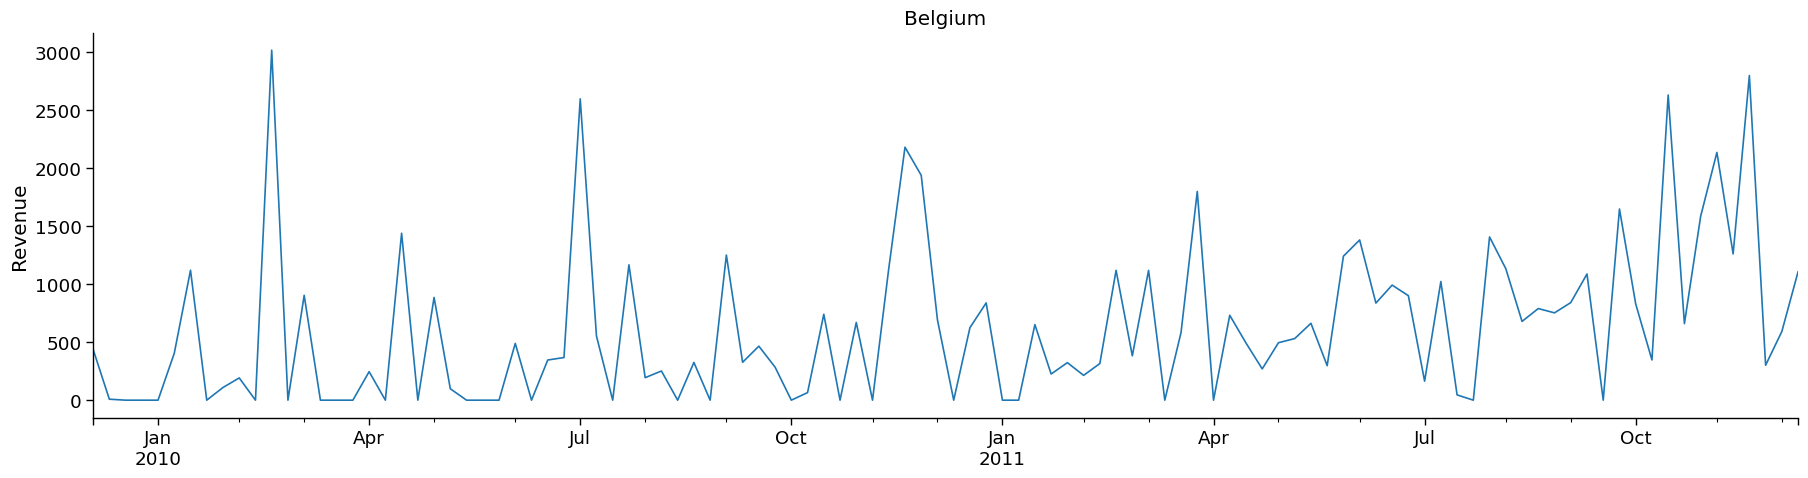

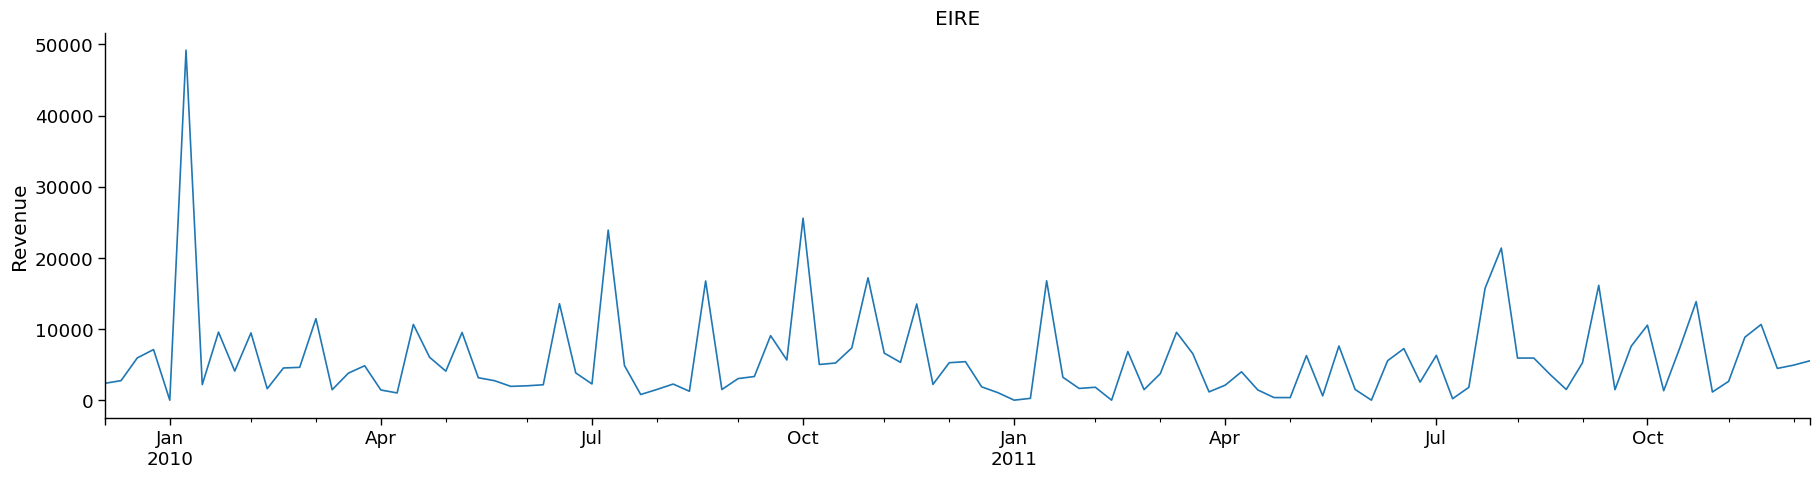

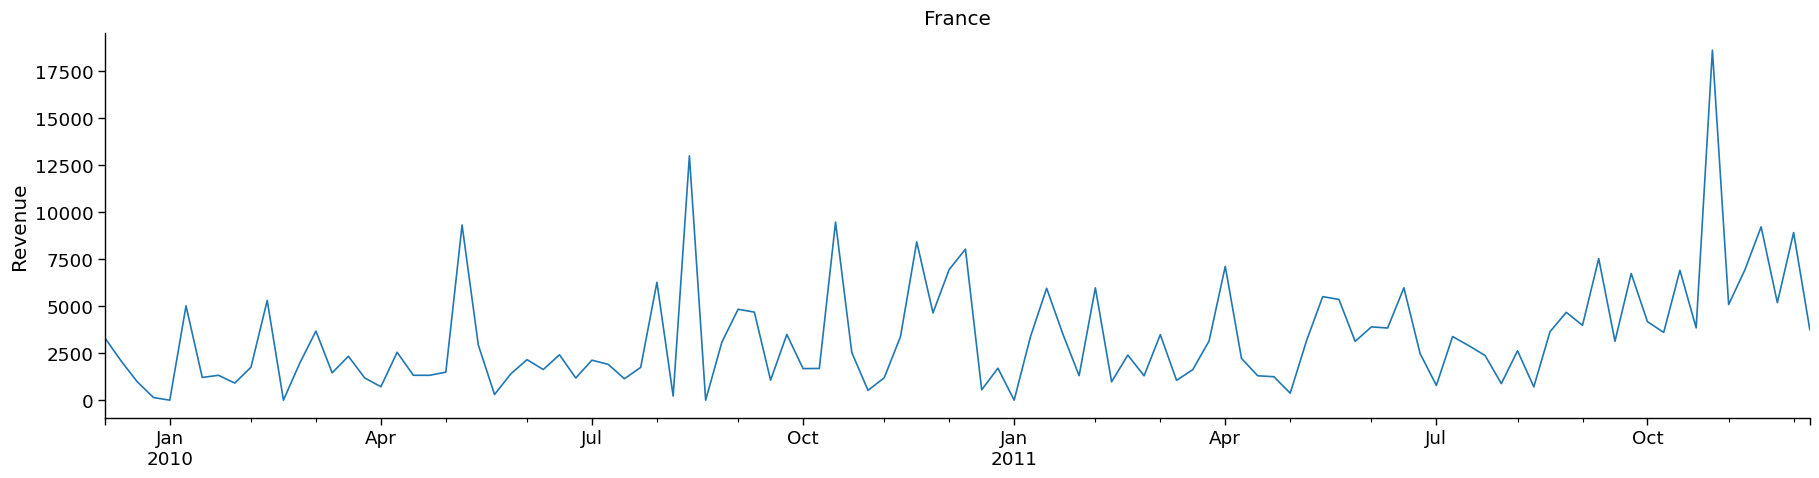

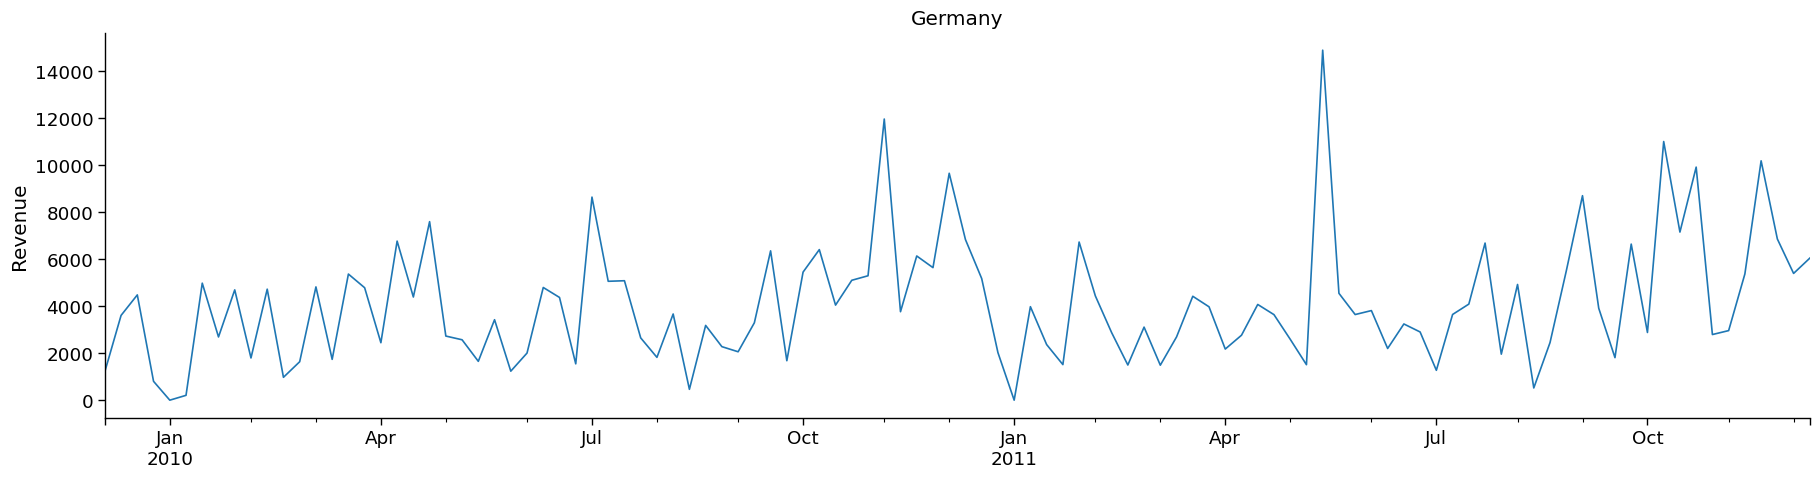

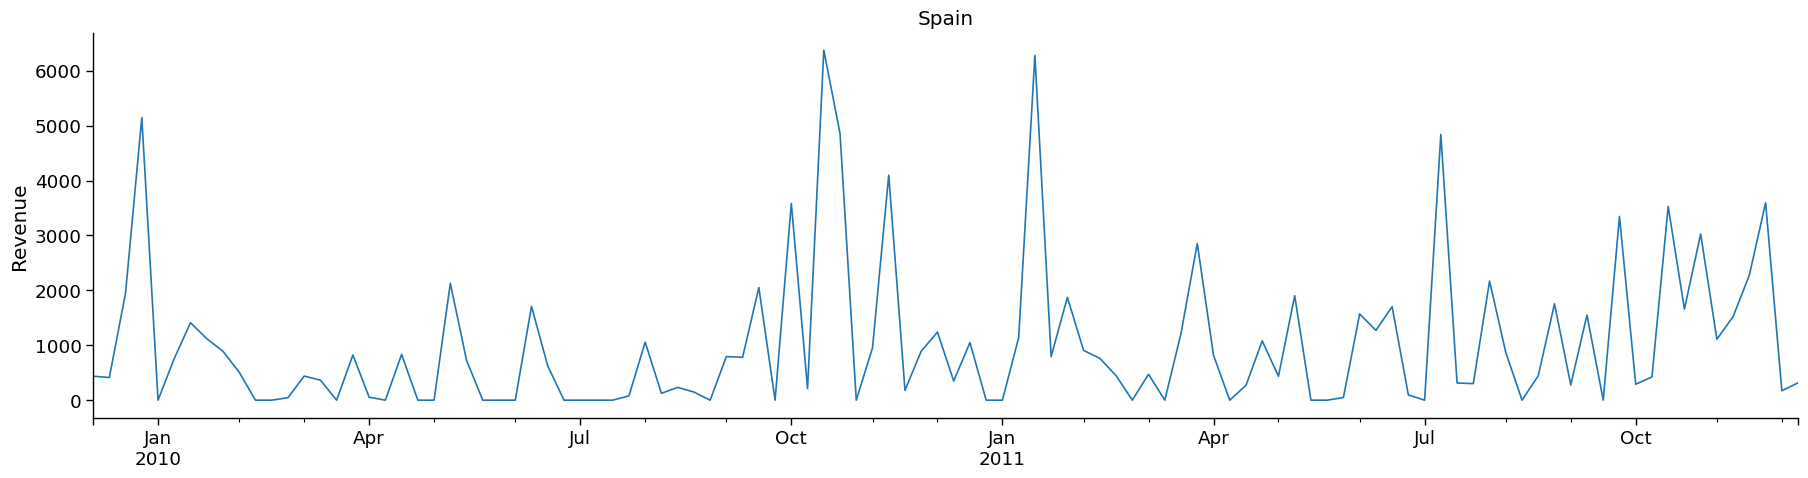

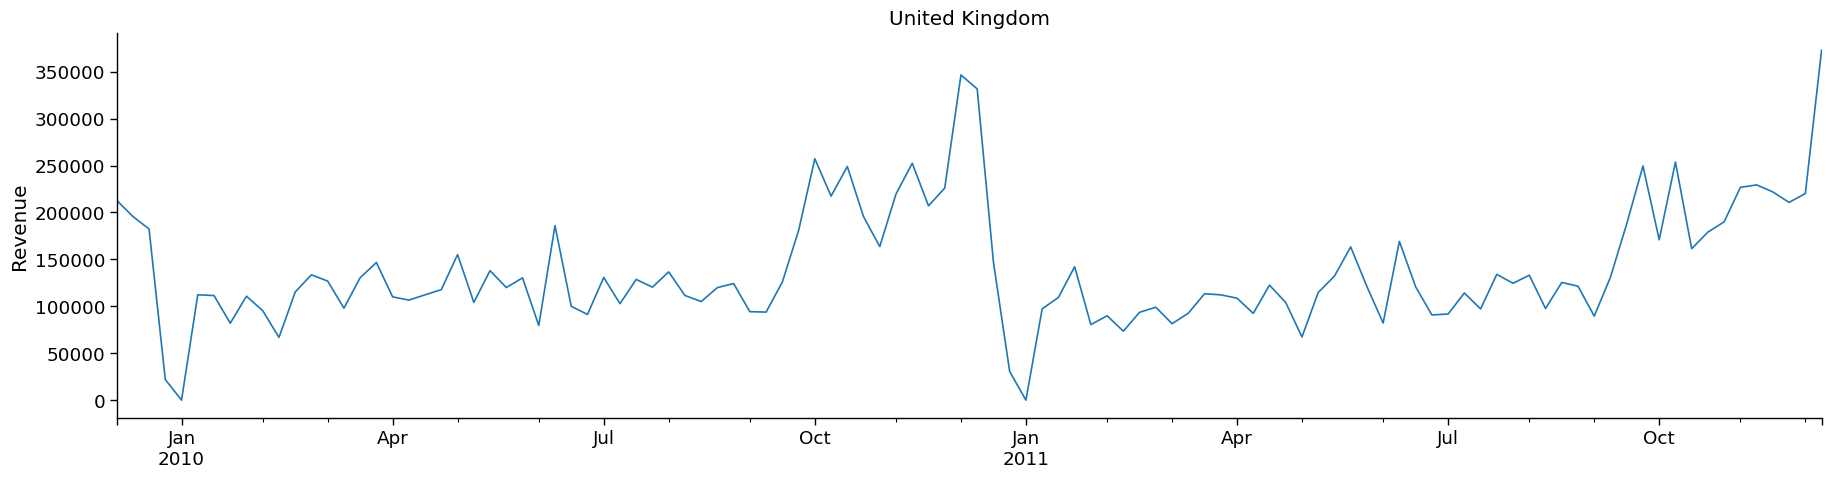

In [4]:
for country in df["country"].unique():
    tmp = df[df["country"]==country]
    tmp["revenue"].plot()
    plt.title(country)
    plt.xlabel("")
    plt.ylabel("Revenue")
    plt.show()

## 3) Feature Engineering

In [5]:
ohe = OneHotEncoder(
    drop="first",  # to encode into k-1 dummies
    handle_unknown="ignore", # if an unknown category appears in transform, it will be encoded as all zeroes:
    sparse=False,
)

# We place the encoder inside the ColumnTransformer to encode only the variable "country".
ct = ColumnTransformer(
    [("ohe", ohe, ["country"])],  # to encode only the variable country
    remainder="passthrough",  # to return all the columns in the resulting array
)

ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 ['country'])])

In [6]:
ct.fit_transform(df)

/Users/razielar/miniconda3/envs/time-series/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,ohe__country_EIRE,ohe__country_France,ohe__country_Germany,ohe__country_Spain,ohe__country_United Kingdom,remainder__quantity,remainder__revenue
week,,,,,,,
2009-12-06,0.0000,0.0000,0.0000,0.0000,0.0000,143,439.1000
2009-12-13,0.0000,0.0000,0.0000,0.0000,0.0000,10,8.5000
2009-12-20,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.0000
2009-12-27,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.0000
2010-01-03,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.0000
...,...,...,...,...,...,...,...
2011-11-13,0.0000,0.0000,0.0000,0.0000,1.0000,135234,"229,378.0100"
2011-11-20,0.0000,0.0000,0.0000,0.0000,1.0000,129454,"221,870.2900"
2011-11-27,0.0000,0.0000,0.0000,0.0000,1.0000,133998,"210,741.7600"
